In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

C:\Users\CHANDRU\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\CHANDRU\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\CHANDRU\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\CHANDRU\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarnin

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [4]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [5]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [6]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test =  scaler.fit_transform(X_test)

In [8]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(11610, 8)
(3870, 8)
(5160, 8)


In [9]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu",input_shape =[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='mean_squared_error',optimizer=keras.optimizers.SGD(lr=1e-3),metrics=['mae'])

In [16]:
model_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid,y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 106us/sample - loss: 0.4190 - mean_absolute_error: 0.4695 - val_loss: 0.4630 - val_mean_absolute_error: 0.5018
Epoch 2/20
11610/11610 [==============================] - 2s 139us/sample - loss: 0.4142 - mean_absolute_error: 0.4661 - val_loss: 0.4622 - val_mean_absolute_error: 0.4987
Epoch 3/20
11610/11610 [==============================] - 1s 99us/sample - loss: 0.4104 - mean_absolute_error: 0.4639 - val_loss: 0.4575 - val_mean_absolute_error: 0.4952
Epoch 4/20
11610/11610 [==============================] - 1s 93us/sample - loss: 0.4065 - mean_absolute_error: 0.4612 - val_loss: 0.4544 - val_mean_absolute_error: 0.4953
Epoch 5/20
11610/11610 [==============================] - 1s 73us/sample - loss: 0.4028 - mean_absolute_error: 0.4586 - val_loss: 0.4520 - val_mean_absolute_error: 0.4942
Epoch 6/20
11610/11610 [==============================] - 1s 81us/sample - loss: 0.3994 - mean

In [17]:
mea_test = model.evaluate(X_test,y_test)

5160/5160 [==============================] - 0s 29us/sample - loss: 0.3937 - mean_absolute_error: 0.4587


In [18]:
model_history.history

{'loss': [0.41895386531474155,
  0.4142366628160156,
  0.4103622191020069,
  0.40652797300942906,
  0.4028231094614583,
  0.3993874503095842,
  0.3963642634932693,
  0.3935218657172003,
  0.39080917256644426,
  0.38831016847945615,
  0.3858910776231948,
  0.3836900409185917,
  0.38174470157894363,
  0.37999745118114886,
  0.3781336701552895,
  0.3764576530502748,
  0.37456077848088626,
  0.37345219589737755,
  0.3718843396217221,
  0.3703763239451465],
 'mean_absolute_error': [0.46947598,
  0.46614257,
  0.46392235,
  0.4611883,
  0.45863155,
  0.45698106,
  0.45471615,
  0.45247614,
  0.45077258,
  0.44919577,
  0.4472345,
  0.44614792,
  0.44400135,
  0.4437132,
  0.44190055,
  0.44104558,
  0.43902537,
  0.43883753,
  0.43772522,
  0.43704414],
 'val_loss': [0.46303862418007175,
  0.4622278124941104,
  0.4575389070874345,
  0.45437912469686464,
  0.4520080731204622,
  0.44787899812524634,
  0.4451036079755433,
  0.44567226977003327,
  0.44316089843286716,
  0.4401310720955063,
  0.4

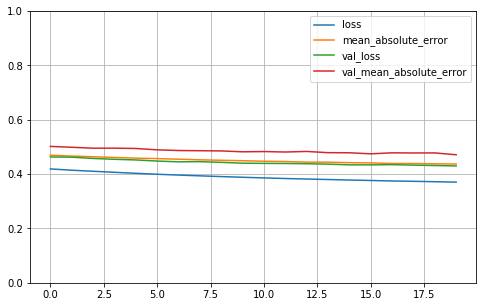

In [19]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()